In [11]:
!pip install pmdarima

  Using cached pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata (8.0 kB)
  Using cached Cython-3.0.11-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

In [1]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [13]:
# Step 1: Fetch Stock Data
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Step 2: Plot Time Series
def plot_time_series(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Stock Prices')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Step 3: Automatically Determine ARIMA Parameters
def determine_arima_params(data):
    print("Running auto_arima to determine optimal (p, d, q)...")
    model = auto_arima(data, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    print(f"Optimal parameters: {model.order}")
    return model.order

# Step 4: Fit ARIMA Model
def fit_arima_model(data, order):
    model = ARIMA(data, order=order)
    fitted_model = model.fit()
    print(fitted_model.summary())
    return fitted_model

# Step 5: Forecast Future Prices
def forecast_prices(model, steps):
    forecast = model.forecast(steps=steps)
    return forecast

def evaluate_forecast(actual, predicted):
    # Ensure the actual and predicted values are aligned as numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)

    # Filter out zeros or invalid actual values
    valid_indices = actual > 0  # Exclude zero or negative values
    actual = actual[valid_indices]
    predicted = predicted[valid_indices]

    # Calculate metrics
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100

    print("\nEvaluation Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

    return {"MAE": mae, "RMSE": rmse, "MAPE": mape}


In [14]:
# Define the stock ticker and date range
ticker = "AAPL"  # Apple Inc.
start_date = "2021-01-01"
end_date = "2023-01-01"

In [15]:
# Fetch stock data
stock_prices = fetch_stock_data(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


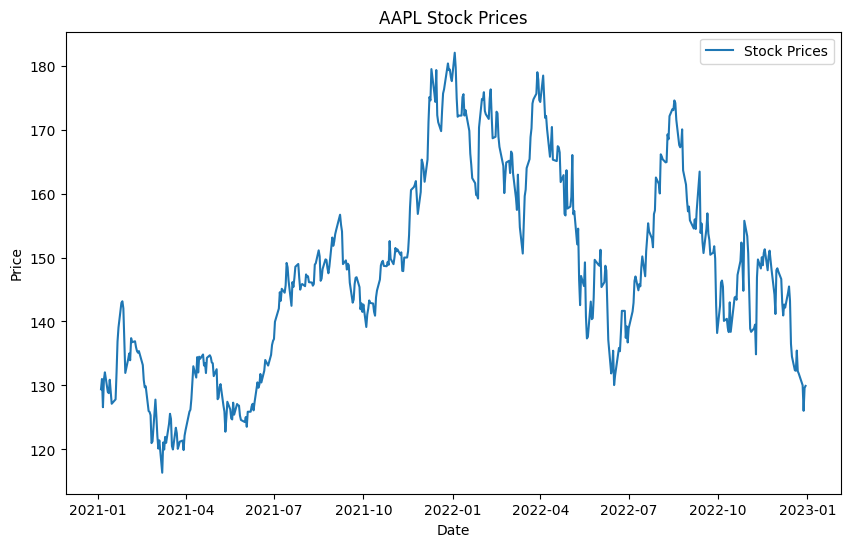

In [16]:
# Plot the original stock prices
plot_time_series(stock_prices, f"{ticker} Stock Prices")

In [17]:
# Automatically determine ARIMA parameters
p, d, q = determine_arima_params(stock_prices)

Running auto_arima to determine optimal (p, d, q)...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2492.611, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2490.218, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2492.095, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2492.076, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2488.218, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2492.874, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.835 seconds
Optimal parameters: (0, 1, 0)


In [18]:
# Fit ARIMA model with optimal parameters
arima_model = fit_arima_model(stock_prices, (p, d, q))

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  503
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1243.109
Date:                Mon, 25 Nov 2024   AIC                           2488.218
Time:                        21:07:01   BIC                           2492.437
Sample:                             0   HQIC                          2489.873
                                - 503                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         8.2875      0.413     20.054      0.000       7.478       9.097
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                30.87
Prob(Q):                              0.73   Pr

c:\Users\Deepraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Deepraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Deepraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [19]:
# Forecast next 30 days
steps = 30
forecast = forecast_prices(arima_model, steps)


c:\Users\Deepraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


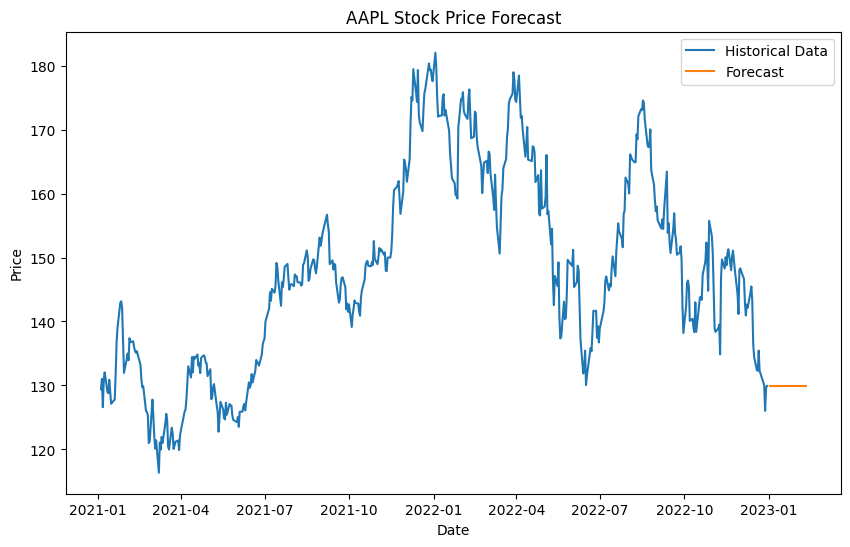

In [20]:
# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, label='Historical Data')
plt.plot(pd.date_range(stock_prices.index[-1], periods=steps + 1, freq='B')[1:], forecast, label='Forecast')
plt.title(f"{ticker} Stock Price Forecast")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
# Evaluate Forecast using the last 30 days of actual data
# Note: Ensure `steps` days of actual data exist for comparison
if len(stock_prices) > steps:
    actual_values = stock_prices[-steps:]
    predicted_values = forecast[:steps]
    evaluation_metrics = evaluate_forecast(actual_values, predicted_values)


Evaluation Metrics:
Mean Absolute Error (MAE): 11.29
Root Mean Squared Error (RMSE): 13.37
Mean Absolute Percentage Error (MAPE): 7.76%


In [ ]:
# For Regression or Forecasting Problems:
# In regression or forecasting (e.g., ARIMA stock price predictions), the concept of accuracy is less direct. Instead, we use error metrics to evaluate model performance:

# Mean Absolute Error (MAE): Measures the average magnitude of the prediction error.
# Root Mean Squared Error (RMSE): Emphasizes larger errors due to squaring.
# Mean Absolute Percentage Error (MAPE): Expresses error as a percentage of actual values.
# While accuracy isn’t calculated directly, MAPE can be inverted to estimate accuracy:

# Accuracy (%)
# =
# 100
# −
# MAPE
# Accuracy (%)=100−MAPE
# For example:

# If MAPE is 5%, the model's accuracy is approximately 95%.